#Space Missions Analysis# 
###Group-2###

##Importing Libraries###

In [ ]:
import pandas as pd  #pandas is a data manipulation and analysis tool 
import numpy as np   #numpy is the library for numerical computation
import seaborn as sns  #seaborn is a library for making statistical graphics
import matplotlib.pyplot as plt  #Matplotlib is a plotting library 
import plotly.express as px   #plotly.express provides consistent and interactive figures

In [ ]:
#Read the csv file
df=pd.read_csv('/content/drive/MyDrive/Space_Corrected.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


#Visualizations

##Current Status of the Rockets##

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



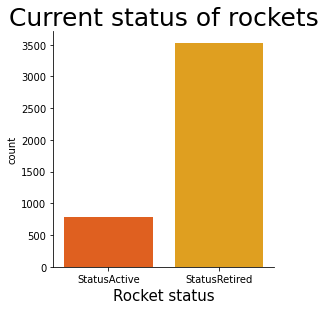

In [ ]:
#To draw the category plot of Status rocket column
sns.catplot('Status Rocket',kind='count',data=df,height=4,palette='autumn')
plt.title('Current status of rockets',size=25)
plt.xlabel('Rocket status',size=15)
plt.show()

Conclusion: Most of the rockets are retired

##Mission Status##

In [ ]:
#to get the count of each mission status
data = df['Status Mission'].value_counts().reset_index()
data.columns = [
    'Status Mission',  
    'count'
]
print(data)

      Status Mission  count
0            Success   3879
1            Failure    339
2    Partial Failure    102
3  Prelaunch Failure      4


In [ ]:
#plotting a pie graph to show the mission status
fig = px.pie(
    data, 
    values='count', 
    names='Status Mission', 
    title='Mission Status in Percentage', 
)

fig.show()

Conclusion: Majority of the status mission is success while the minimum is prelaunch failure

##Company##

In [ ]:
#To get the number of rockets owned per company
data = df['Company Name'].value_counts().reset_index()

data.columns = [
    'Company Name', 
    'count'
]

print(data)

        Company Name  count
0          RVSN USSR   1777
1        Arianespace    279
2               CASC    251
3   General Dynamics    251
4               NASA    203
5             VKS RF    201
6       US Air Force    161
7                ULA    140
8             Boeing    136
9    Martin Marietta    114
10            SpaceX    100
11               MHI     84
12          Northrop     83
13          Lockheed     79
14              ISRO     76
15         Roscosmos     55
16               ILS     46
17        Sea Launch     36
18              ISAS     30
19         Kosmotras     22
20           US Navy     17
21          Eurockot     13
22               ESA     13
23        Rocket Lab     13
24               ISA     13
25       Blue Origin     12
26               IAI     11
27            ExPace     10
28               ASI      9
29              AMBA      8
30              CNES      8
31              JAXA      7
32              MITT      7
33       Land Launch      7
34                UT

In [ ]:
#plotting the bar graph for company
fig = px.bar(
    data,  
    x='count', 
    y='Company Name', 
    orientation='h', 
    title='Company and its count of Rocket'
) 

fig.show()

Conclusion: RVSN USSR owns the highest number of rockets

##Status Rocket## 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



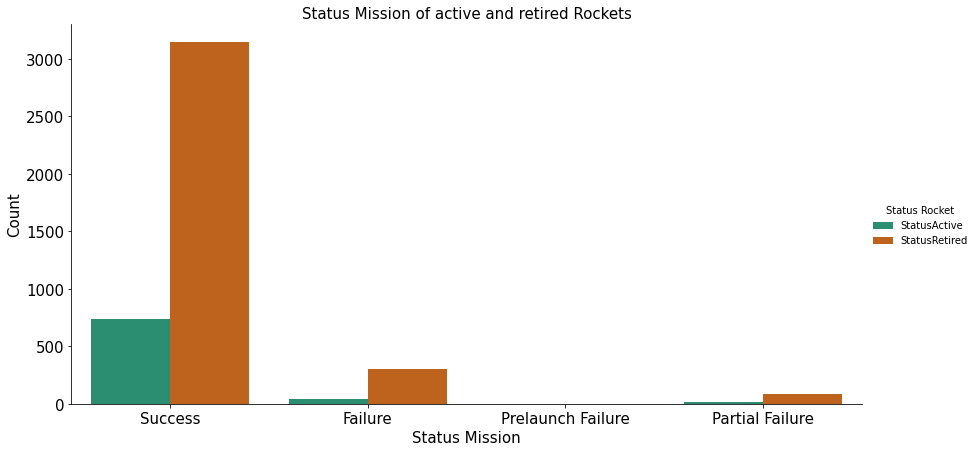

In [ ]:
#counting the status mission with respect to active and retired rockets
sns.catplot('Status Mission',kind='count',data=df,hue='Status Rocket',palette='Dark2',height=6,aspect=2)  
plt.xticks(size=15)
plt.xlabel('Status Mission',size=15)
plt.yticks(size=15)
plt.ylabel('Count',size=15)
plt.title('Status Mission of active and retired Rockets',size=15)
plt.show()

Conclusion: Retired rockets has highest success rate 

##Success Rocket Analysis##

In [ ]:
#success rocket analysis count
success=df[df['Status Mission']=='Success']

data = success['Company Name'].value_counts().reset_index()

data.columns = [
    'Status Mission', 
    'count'
]

data = data.sort_values('count')
print(data)

      Status Mission  count
48           i-Space      1
40        Khrunichev      1
41              IRGC      1
42              KARI      1
47           Starsem      1
44               RAE      1
45            CECLES      1
46                UT      1
43           Douglas      1
35               SRC      2
36          Yuzhmash      2
38              KCST      2
39           OKB-586      2
37           US Navy      2
34             CASIC      3
33   Arm??e de l'Air      3
32              AMBA      4
31               ISA      4
30              MITT      6
29              JAXA      6
28              CNES      6
27       Land Launch      6
25               ESA      9
26               IAI      9
24               ASI      9
23            ExPace      9
22        Rocket Lab     11
21       Blue Origin     12
20          Eurockot     12
19         Kosmotras     21
18              ISAS     26
17        Sea Launch     33
16               ILS     45
15         Roscosmos     51
14              ISRO

In [ ]:
#success rocket analysis visualization
fig = px.bar(  
     data.tail(25),
    y='count', 
    x='Status Mission', 
    orientation='v', 
    title='Company with highest Success Rockets', 
    width=700, 
    height=700,
    color='count',
    
)

fig.show()

Conclusion: RVSN USSR has highest success rate

In [ ]:
#To get the current status of successful rockets
data = success['Status Rocket'].value_counts().reset_index()

data.columns = [
    'Status Rocket', 
    'count'
]
print(data)

   Status Rocket  count
0  StatusRetired   3143
1   StatusActive    736


In [ ]:
#To plot the pie chart for the current status of successful rockets
fig = px.pie(
    data, 
    values='count', 
    names='Status Rocket', 
    title='Current Status of Success Rockets in Percentage', 
    width=500, 
    height=500,
)

fig.show()

Conclusion: Retired rockets have had highest success while the active rockets have had lesser success

##Failure Rocket Analysis##

In [ ]:
#Failure rocket analysis count
Failure=df[df['Status Mission']=='Failure']

data = Failure['Company Name'].value_counts().reset_index()

data.columns = [
    'Status Mission', 
    'count'
]

data = data.sort_values('count')
print(data)

      Status Mission  count
42            ExPace      1
30              JAXA      1
32               SRC      1
33      Virgin Orbit      1
34              Exos      1
35         Landspace      1
31              MITT      1
37         Kosmotras      1
38               RAE      1
39          Eurockot      1
40               EER      1
36          OneSpace      1
41            Sandia      1
29        Rocket Lab      2
28               AEB      2
27              CNES      2
26               IAI      2
25             CASIC      2
24              KARI      2
23               MHI      2
22         Roscosmos      3
21            Boeing      3
19              AMBA      3
18              KCST      3
17        Sea Launch      3
16              ISAS      3
15               ESA      3
20            CECLES      3
14                UT      4
13            SpaceX      4
12          Lockheed      5
9           Northrop      7
11            VKS RF      7
10       Arianespace      7
8               ISRO

In [ ]:
# Visualization of failure  rocket using scatter
fig = px.line(  
     data.tail(25),
    y='count', 
    x='Status Mission', 
    title='Company with highest Failure Rockets', 
    width=700, 
    height=700
)
 
fig.show()

Conclusion: RVSN USSR has highest number of failures

In [ ]:
#Failure rocket status analysis
data = Failure['Status Rocket'].value_counts().reset_index()

data.columns = [
    'Status Rocket', 
    'count'
]
print(data)

   Status Rocket  count
0  StatusRetired    300
1   StatusActive     39


In [ ]:
#to plot the pie chart for the current status of failure rockets
fig = px.pie(
    data, 
    values='count', 
    names='Status Rocket', 
    title='Current Status  of Failure Rockets in Percentage', 
    width=500, 
    height=500
)

fig.show()

Conclusion: Most Failure Rockets are now Retired

##ISRO analysis##

In [ ]:
# Count Of rockets launched by ISRO
isro=df[df['Company Name']=='ISRO']
print("No Of rockets launched by ISRO",isro.shape[0])

No Of rockets launched by ISRO 76


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



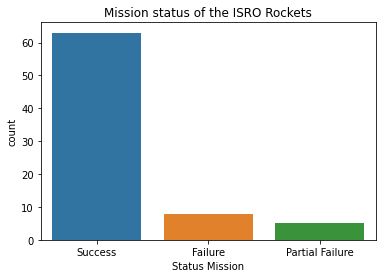

In [ ]:
# Status Mission of ISRO Rockets
sns.countplot(isro['Status Mission'])
plt.title("Mission status of the ISRO Rockets")
plt.show()

Conclusion: ISRO has gven more successful space mission than failure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



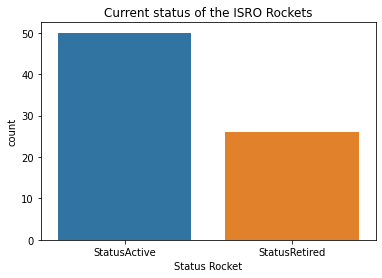

In [ ]:
# Current Status of ISRO Rockets
sns.countplot(isro['Status Rocket'])
plt.title("Current status of the ISRO Rockets")
plt.show()

Conclusion: Number of active rockets of ISRO is more when compared to retired rockets

##Country Analysis##

In [ ]:
#Extracting Country using the location column
df['country'] = df['Location'].str.split(', ').str[-1]
df['country'].head()   

0           USA
1         China
2           USA
3    Kazakhstan
4           USA
Name: country, dtype: object

In [ ]:
# Count of Each country's Rocket Missions
data = df['country'].value_counts().reset_index()

data.columns = [
    'Country', 
    'count'
]

In [ ]:
# Countries with Rocket Missions
fig = px.scatter(  
     data,
    y='count', 
    x='Country',  
    title='Country with Rocket missions', 
    size='count',
    size_max=30
)
fig.show()

Conclusion: Russia has had the highest number of space missions

In [ ]:
#Countries with Successful space missions
Success1=df[df['Status Mission']=='Success']

data = Success1['country'].value_counts().reset_index()

data.columns = [
    'Country', 
    'count'
]

fig = px.scatter(
    data, 
    y='count', 
    x='Country', 
    title='Country with most successful space missions',
    height=700,
    size='count',
    size_max=30
)

fig.show()

Conclusion: Russia has had the highest number of successful space missions

##Launch Year##

In [ ]:
# To analyse and plot the number of space mission per year
def get_year(x):
    return x[12:16]
df['Year']=df['Datum'].map(get_year)
df['Year']=df['Year'].astype('int64')

data = df['Year'].value_counts().reset_index()

data.columns = [
    'Year', 
    'count'
]

fig = px.bar(
    data, 
    y='count', 
    x='Year', 
    orientation='v', 
    title='Year with most space missions', 
    color='count'
)

fig.show()

Conclusion: 1971 majority of the space missions took place

In [ ]:
# To analyse and plot the number of successful space mission per year
Success=df[df['Status Mission']=='Success']

data = Success['Year'].value_counts().reset_index()

data.columns = [
    'Year', 
    'count'
]

fig = px.bar(
    data, 
    y='count', 
    x='Year',  
    title='Year with most successful space missions', 
    height=800,
    color='count'
)

fig.show()

Conclusion: In 2018, maximum successful space missions took place

##Launch Month##

In [ ]:
# To analyse and plot the number of space mission per month
def get_month(x):
    return x[4:7]
df['Month']=df['Datum'].map(get_month)
 
data = df['Month'].value_counts().reset_index()
 
data.columns = [
    'Month', 
    'count'
]
 
fig = px.line(
    data, 
    y='count', 
    x='Month', 
    title='Month with most space missions', 
    height=500)
fig.show()

Conclusion: Maximum number of space missions take place in the month of December

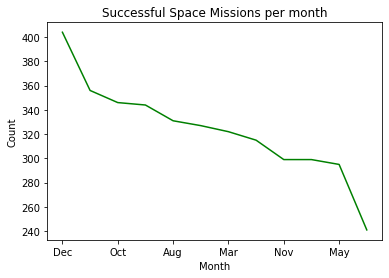

In [ ]:
# To analyse and plot the number of successful space mission per month
Successs=df[df['Status Mission']=='Success']
Successs['Month'].value_counts().plot(kind='line',color='green')
plt.title('Successful Space Missions per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Conclusion: December has seen maximum successful space missions

##Latest Launches per company

In [ ]:
#To get the records of latest launch
df_latest=df[df['Year']==2020]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



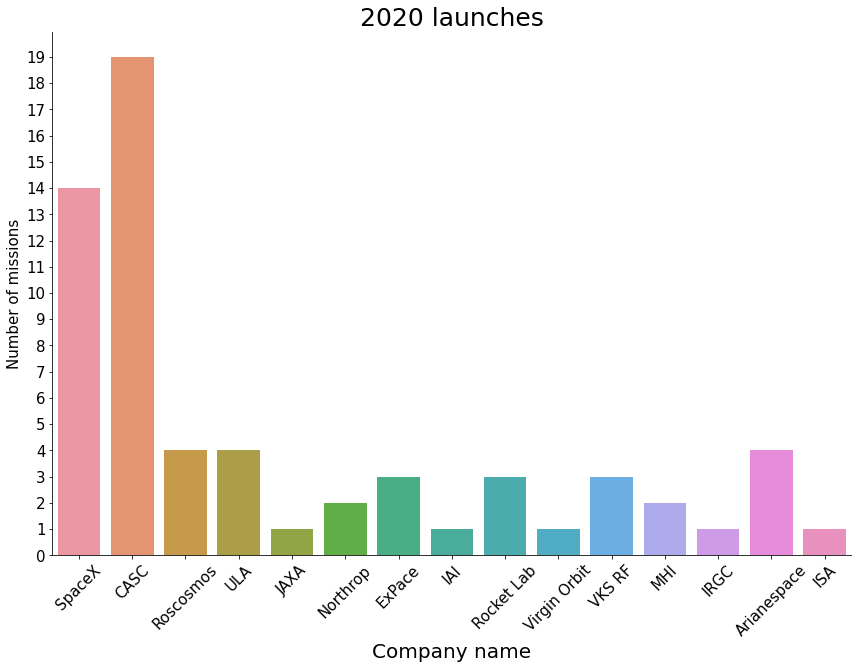

In [ ]:
# Plot latest launches using categoryplot
sns.catplot('Company Name',data=df_latest,kind='count',height=8,aspect=1.5)
plt.yticks(np.arange(20))
plt.title('2020 launches',size=25)
plt.xlabel('Company name',size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.ylabel('Number of missions',size=15)
plt.show()

Conclusion: CASC has the maximum latest space missions

##The space missions through the years##

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



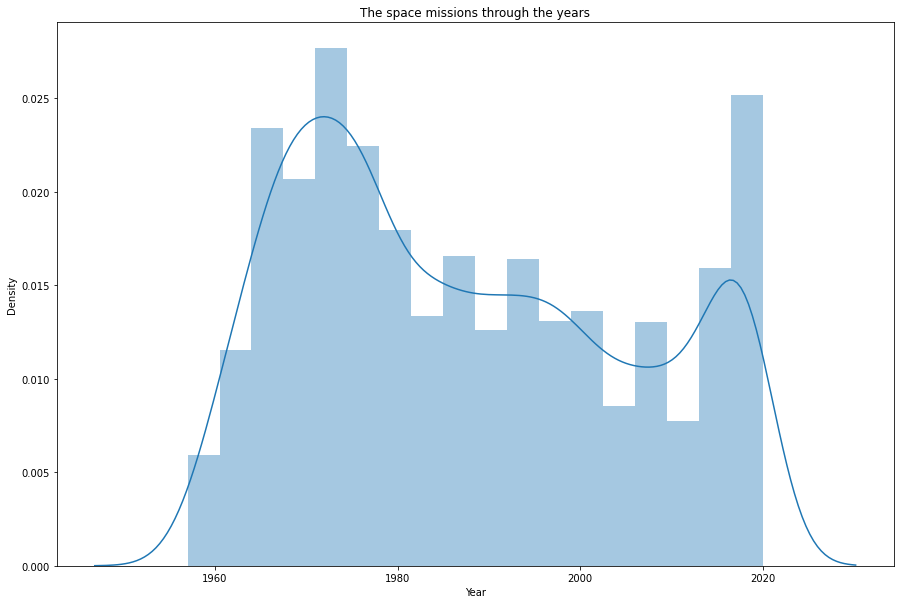

In [ ]:
# to plot the space missions through the years
plt.figure(figsize=(15,10))
sns.distplot(df['Year'])
plt.title("The space missions through the years")
plt.show()

#PreProcessing

##Information of the dataframe##

In [ ]:
# to find the Information of the dataframe#
print("The information of the space dataframe is")
print(df.info())

The information of the space dataframe is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
 9   country         4324 non-null   object
 10  Year            4324 non-null   int64 
 11  Month           4324 non-null   object
dtypes: int64(3), object(9)
memory usage: 405.5+ KB
None


##rows and columns of the dataframe##

In [ ]:
# to find the rows and columns of the dataframe#
print("The number of rows and columns are")
print(df.shape)

The number of rows and columns are
(4324, 12)


##columns present in dataframe##

In [ ]:
#To get the columns present in dataframe#
print("The columns present in dataframe is")
print(df.columns)

The columns present in dataframe is
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission', 'country',
       'Year', 'Month'],
      dtype='object')


In [ ]:
df.drop('Unnamed: 0.1',axis=1,inplace=True) # Dropping Unnamed: 0.1 column since it does not provide any information
df.head()

,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,Year,Month
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,Aug
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,Aug
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,Aug
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,Jul
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,Jul


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True) # Dropping Unnamed: 0 column since it does not provide any information
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,Jul


##Descriptive statistics of the dataframe##

In [ ]:
#To print the descriptive statistics of the dataframe#
print("The descriptive statistics of the dataframe is")
df.describe()

The descriptive statistics of the dataframe is


,Year
count,4324.000000
mean,1987.386679
std,18.072562
min,1957.000000
25%,1972.000000
50%,1984.000000
75%,2002.000000
max,2020.000000


##value count of mission status column##

In [ ]:
#To get the value count of mission status column#
print("The value count of mission status column in the dataset is")
df["Status Mission"].value_counts()

The value count of mission status column in the dataset is


Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

##Null values in the dataframe##

In [ ]:
# To find any null values in the dataframe#
df.isna().any() 

Company Name      False
Location          False
Datum             False
Detail            False
Status Rocket     False
 Rocket            True
Status Mission    False
country           False
Year              False
Month             False
dtype: bool

##Number of null values in Rocket column of the dataframe




In [ ]:
# To find the number of null values in Rocket column of the dataframe
df[' Rocket'].isna().value_counts()

True     3360
False     964
Name:  Rocket, dtype: int64

In [ ]:
df.drop(' Rocket',axis=1,inplace=True) # Dropping Rocket since it contains lots of null values
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA,2020,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China,2020,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success,USA,2020,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan,2020,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success,USA,2020,Jul


##Datatype of all the columns in the dataframe

In [ ]:
# To find the datatype of all the columns in the dataframe
df.dtypes 

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
Status Mission    object
country           object
Year               int64
Month             object
dtype: object

##Remove the word Status in Status Rocket column Values

In [ ]:
# To change the Status Rocket column values from StatusActive to Active by removing the word Status
df['Status Rocket']=df['Status Rocket'].str.replace('Status','')
print(df['Status Rocket'])

0        Active
1        Active
2        Active
3        Active
4        Active
         ...   
4319    Retired
4320    Retired
4321    Retired
4322    Retired
4323    Retired
Name: Status Rocket, Length: 4324, dtype: object
